In [169]:
import math

import numpy as np
from scipy import optimize

from astropy.table import QTable
from astropy.io import fits
from astropy.coordinates import SkyCoord

from astropy import units as u

In [23]:
%matplotlib inline
from matplotlib import pyplot as plt

In [9]:
phat_tab = QTable.read('hlsp_phat_hst_wfc3-uvis-acs-wfc-wfc3-ir_12110-m31-b19-f01_f275w-f336w-f475w-f814w-f110w-f160w_v2_phot.fits.gz')
phat_tab['coord'] = SkyCoord.guess_from_table(phat_tab, unit='deg')
phat_tab

EXT,CHIP,X,Y,CHI_GL,SNR_GL,SHARP_GL,ROUND_GL,MAJAX_GL,CROWD_GL,OBJTYPE_GL,COUNTS1,BG1,RATE1,RATE1_ERR,MAG1_VEGA,MAG1_STD,MAG1_ERR,CHI1,SNR1,SHARP1,ROUND1,CROWD1,FLAG1,COUNTS2,BG2,RATE2,RATE2_ERR,MAG2_VEGA,MAG2_STD,MAG2_ERR,CHI2,SNR2,SHARP2,ROUND2,CROWD2,FLAG2,COUNTS3,BG3,RATE3,RATE3_ERR,MAG3_VEGA,MAG3_STD,MAG3_ERR,CHI3,SNR3,SHARP3,ROUND3,CROWD3,FLAG3,COUNTS4,BG4,RATE4,RATE4_ERR,MAG4_VEGA,MAG4_STD,MAG4_ERR,CHI4,SNR4,SHARP4,ROUND4,CROWD4,FLAG4,COUNTS5,BG5,RATE5,RATE5_ERR,MAG5_VEGA,MAG5_STD,MAG5_ERR,CHI5,SNR5,SHARP5,ROUND5,CROWD5,FLAG5,COUNTS_IM1,BG_IM1,RATE_IM1,RATERR_IM1,MAGVEGA_IM1,MAGSTD_IM1,MAGERR_IM1,CHI_IM1,SNR_IM1,SHARP_IM1,ROUND_IM1,CROWD_IM1,FLAG_IM1,COUNTS_IM2,BG_IM2,RATE_IM2,RATERR_IM2,MAGVEGA_IM2,MAGSTD_IM2,MAGERR_IM2,CHI_IM2,SNR_IM2,SHARP_IM2,ROUND_IM2,CROWD_IM2,FLAG_IM2,COUNTS_IM3,BG_IM3,RATE_IM3,RATERR_IM3,MAGVEGA_IM3,MAGSTD_IM3,MAGERR_IM3,CHI_IM3,SNR_IM3,SHARP_IM3,ROUND_IM3,CROWD_IM3,FLAG_IM3,COUNTS_IM4,BG_IM4,RATE_IM4,RATERR_IM4,MAGVEGA_IM4,MAGSTD_IM4,MAGERR_IM4,CHI_IM4,SNR_IM4,SHARP_IM4,ROUND_IM4,CROWD_IM4,FLAG_IM4,COUNTS_IM5,BG_IM5,RATE_IM5,RATERR_IM5,MAGVEGA_IM5,MAGSTD_IM5,MAGERR_IM5,CHI_IM5,SNR_IM5,SHARP_IM5,ROUND_IM5,CROWD_IM5,FLAG_IM5,COUNTS_IM6,BG_IM6,RATE_IM6,RATERR_IM6,MAGVEGA_IM6,MAGSTD_IM6,MAGERR_IM6,CHI_IM6,SNR_IM6,SHARP_IM6,ROUND_IM6,CROWD_IM6,FLAG_IM6,COUNTS_IM7,BG_IM7,RATE_IM7,RATERR_IM7,MAGVEGA_IM7,MAGSTD_IM7,MAGERR_IM7,CHI_IM7,SNR_IM7,SHARP_IM7,ROUND_IM7,CROWD_IM7,FLAG_IM7,COUNTS_IM8,BG_IM8,RATE_IM8,RATERR_IM8,MAGVEGA_IM8,MAGSTD_IM8,MAGERR_IM8,CHI_IM8,SNR_IM8,SHARP_IM8,ROUND_IM8,CROWD_IM8,FLAG_IM8,COUNTS_IM9,BG_IM9,RATE_IM9,RATERR_IM9,MAGVEGA_IM9,MAGSTD_IM9,MAGERR_IM9,CHI_IM9,SNR_IM9,SHARP_IM9,ROUND_IM9,CROWD_IM9,FLAG_IM9,COUNTS_IM10,BG_IM10,RATE_IM10,RATERR_IM10,MAGVEGA_IM10,MAGSTD_IM10,MAGERR_IM10,CHI_IM10,SNR_IM10,SHARP_IM10,ROUND_IM10,CROWD_IM10,FLAG_IM10,COUNTS_IM11,BG_IM11,RATE_IM11,RATERR_IM11,MAGVEGA_IM11,MAGSTD_IM11,MAGERR_IM11,CHI_IM11,SNR_IM11,SHARP_IM11,ROUND_IM11,CROWD_IM11,FLAG_IM11,COUNTS_IM12,BG_IM12,RATE_IM12,RATERR_IM12,MAGVEGA_IM12,MAGSTD_IM12,MAGERR_IM12,CHI_IM12,SNR_IM12,SHARP_IM12,ROUND_IM12,CROWD_IM12,FLAG_IM12,COUNTS_IM13,BG_IM13,RATE_IM13,RATERR_IM13,MAGVEGA_IM13,MAGSTD_IM13,MAGERR_IM13,CHI_IM13,SNR_IM13,SHARP_IM13,ROUND_IM13,CROWD_IM13,FLAG_IM13,COUNTS_IM14,BG_IM14,RATE_IM14,RATERR_IM14,MAGVEGA_IM14,MAGSTD_IM14,MAGERR_IM14,CHI_IM14,SNR_IM14,SHARP_IM14,ROUND_IM14,CROWD_IM14,FLAG_IM14,COUNTS_IM15,BG_IM15,RATE_IM15,RATERR_IM15,MAGVEGA_IM15,MAGSTD_IM15,MAGERR_IM15,CHI_IM15,SNR_IM15,SHARP_IM15,ROUND_IM15,CROWD_IM15,FLAG_IM15,COUNTS_IM16,BG_IM16,RATE_IM16,RATERR_IM16,MAGVEGA_IM16,MAGSTD_IM16,MAGERR_IM16,CHI_IM16,SNR_IM16,SHARP_IM16,ROUND_IM16,CROWD_IM16,FLAG_IM16,COUNTS_IM17,BG_IM17,RATE_IM17,RATERR_IM17,MAGVEGA_IM17,MAGSTD_IM17,MAGERR_IM17,CHI_IM17,SNR_IM17,SHARP_IM17,ROUND_IM17,CROWD_IM17,FLAG_IM17,COUNTS_IM18,BG_IM18,RATE_IM18,RATERR_IM18,MAGVEGA_IM18,MAGSTD_IM18,MAGERR_IM18,CHI_IM18,SNR_IM18,SHARP_IM18,ROUND_IM18,CROWD_IM18,FLAG_IM18,COUNTS_IM19,BG_IM19,RATE_IM19,RATERR_IM19,MAGVEGA_IM19,MAGSTD_IM19,MAGERR_IM19,CHI_IM19,SNR_IM19,SHARP_IM19,ROUND_IM19,CROWD_IM19,FLAG_IM19,COUNTS_IM20,BG_IM20,RATE_IM20,RATERR_IM20,MAGVEGA_IM20,MAGSTD_IM20,MAGERR_IM20,CHI_IM20,SNR_IM20,SHARP_IM20,ROUND_IM20,CROWD_IM20,FLAG_IM20,COUNTS_IM21,BG_IM21,RATE_IM21,RATERR_IM21,MAGVEGA_IM21,MAGSTD_IM21,MAGERR_IM21,CHI_IM21,SNR_IM21,SHARP_IM21,ROUND_IM21,CROWD_IM21,FLAG_IM21,COUNTS_IM22,BG_IM22,RATE_IM22,RATERR_IM22,MAGVEGA_IM22,MAGSTD_IM22,MAGERR_IM22,CHI_IM22,SNR_IM22,SHARP_IM22,ROUND_IM22,CROWD_IM22,FLAG_IM22,COUNTS_IM23,BG_IM23,RATE_IM23,RATERR_IM23,MAGVEGA_IM23,MAGSTD_IM23,MAGERR_IM23,CHI_IM23,SNR_IM23,SHARP_IM23,ROUND_IM23,CROWD_IM23,FLAG_IM23,COUNTS_IM24,BG_IM24,RATE_IM24,RATERR_IM24,MAGVEGA_IM24,MAGSTD_IM24,MAGERR_IM24,CHI_IM24,SNR_IM24,SHARP_IM24,ROUND_IM24,CROWD_IM24,FLAG_IM24,COUNTS_IM25,BG_IM25,RATE_IM25,RATERR_IM25,MAGVEGA_IM25,MAGSTD_IM25,MAGERR_IM25,CHI_IM25,SNR_IM25,SHARP_IM25,ROUND_IM25,CROWD_IM25,FLAG_IM25,COUNTS_IM26,BG_IM26,RATE_IM26,RATERR_IM26,MAGVEGA_IM26,MAGSTD_IM26,MAGERR_IM26

In [27]:
smaller_phat_tab = phat_tab[np.random.permutation(len(phat_tab))[:10000]]

In [21]:
gaia_tab = QTable.read('1663787041024O-result.vot.gz')
gaia_tab['coord'] = SkyCoord(ra=gaia_tab['ra'], dec=gaia_tab['dec'])
gaia_tab

source_id,ra,dec,parallax,pmra,pmdec,ruwe,phot_g_mean_mag,bp_rp,radial_velocity,phot_variable_flag,non_single_star,has_xp_continuous,has_xp_sampled,has_rvs,has_epoch_photometry,has_epoch_rv,has_mcmc_gspphot,has_mcmc_msc,teff_gspphot,logg_gspphot,mh_gspphot,distance_gspphot,azero_gspphot,ag_gspphot,ebpminrp_gspphot,coord
,deg,deg,mas,mas / yr,mas / yr,,mag,mag,km / s,,,,,,,,,,K,log(cm.s**-2),dex,pc,mag,mag,mag,"deg,deg"
int64,float64,float64,float64,float64,float64,float32,float32,float32,float32,object,int16,bool,bool,bool,bool,bool,bool,bool,float32,float32,float32,float32,float32,float32,float32,SkyCoord
375319634173001216,11.71918171187764,42.12940498004916,-0.6624234049846444,2.164359210566824,-0.009182127729049975,0.9884617,19.969532012939453,0.7698307037353516,———,NOT_AVAILABLE,0,False,False,False,True,False,False,False,———,———,———,———,———,———,———,"11.71918171187764,42.12940498004916"
375319634175045632,11.735939247506984,42.11370433103429,———,———,———,--,21.015451431274414,2.3236255645751953,———,NOT_AVAILABLE,0,False,False,False,True,False,False,False,———,———,———,———,———,———,———,"11.735939247506984,42.11370433103429"
375294001807935232,11.668166584229816,41.988060169349986,-0.5301914001198675,-0.2865868587606379,-0.14754327555705726,0.9760133,19.906484603881836,1.076873779296875,———,NOT_AVAILABLE,0,False,False,False,True,False,False,False,———,———,———,———,———,———,———,"11.668166584229816,41.988060169349986"
375294006102534912,11.672247612951855,41.99186924681972,-0.039627133146664516,1.7460728652078583,1.0594860868571288,0.9428398,20.71647071838379,1.5370960235595703,———,NOT_AVAILABLE,0,False,False,False,True,False,False,False,———,———,———,———,———,———,———,"11.672247612951855,41.99186924681972"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375338089647764480,11.677274659612305,42.23482944308602,0.9402212096700462,-1.4238040431637677,-2.649846810071937,1.01852,10.560498237609863,1.3208341598510742,-1.9040988683700562,NOT_AVAILABLE,0,True,True,False,True,False,False,True,———,———,———,———,———,———,———,"11.677274659612305,42.23482944308602"
375338089647767040,11.677041916031447,42.22819381913,0.7983383922360769,3.0801482207902704,-0.207931092375079,0.99917895,15.879976272583008,1.0597305297851562,———,NOT_AVAILABLE,0,True,False,False,True,False,True,True,5244.8232421875,4.588099956512451,-0.07199999690055847,1004.2999877929688,0.20569999516010284,0.1665000021457672,0.0885000005364418,"11.677041916031447,42.22819381913"
375338154072165120,11.66149942857713,42.23904289452475,0.017551681489619275,0.5746286089197159,0.6759743693114503,0.979988,19.873302459716797,1.7564048767089844,———,NOT_AVAILABLE,0,False,False,False,True,False,False,False,———,———,———,———,———,———,———,"11.66149942857713,42.23904289452475"


(42.059369058, 42.148009521999995)

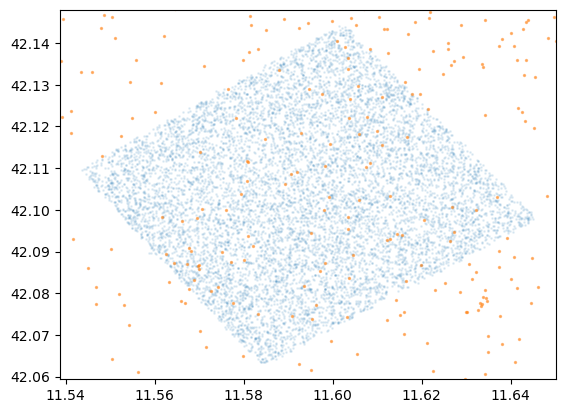

In [34]:
plt.scatter(smaller_phat_tab['coord'].ra.deg, smaller_phat_tab['coord'].dec.deg, s=1, alpha=.1)
xl = plt.xlim()
yl = plt.ylim()

plt.scatter(gaia_tab['ra'], gaia_tab['dec'], s=2, alpha=.5)

plt.xlim(*xl)
plt.ylim(*yl)

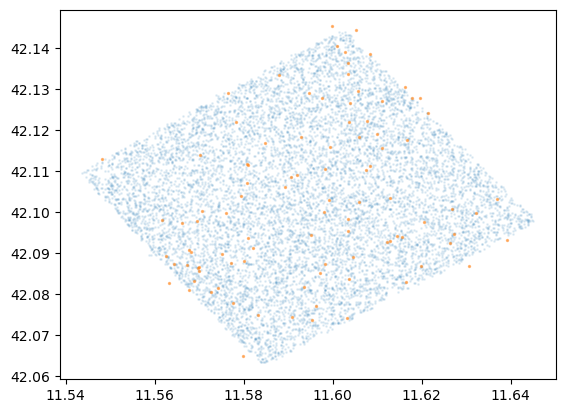

In [47]:
sep = gaia_tab['coord'].match_to_catalog_sky(smaller_phat_tab['coord'])[1]
gaia_near = gaia_tab[sep < .002*u.deg]

plt.scatter(smaller_phat_tab['coord'].ra.deg, smaller_phat_tab['coord'].dec.deg, s=1, alpha=.1)
plt.scatter(gaia_near['ra'], gaia_near['dec'], s=2, alpha=.5);

In [84]:
match, sep, _ = gaia_tab['coord'].match_to_catalog_sky(phat_tab['coord'])

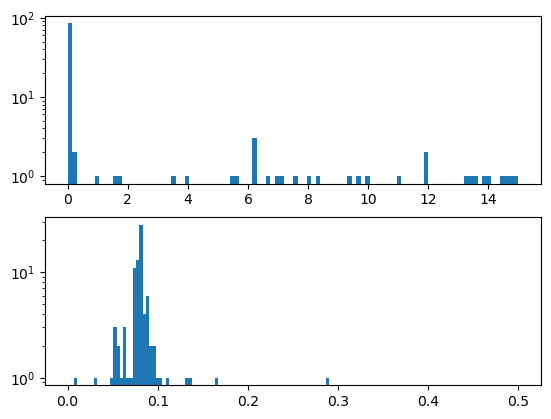

In [88]:
fig, (ax1, ax2) = plt.subplots(2, 1)
ax1.hist(sep.arcsec.unmasked,range=(0, 15), bins=100, log=True)
ax2.hist(sep.arcsec.unmasked,range=(0, .5), bins='auto', log=True);

(<MaskedAngle 107.09777892 marcsec>, <MaskedAngle -11.69338408 marcsec>)

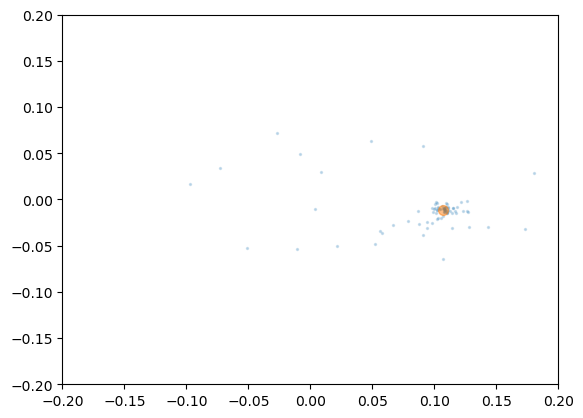

In [108]:
dra = gaia_tab['coord'].ra - phat_tab['coord'].ra[match]
ddec = gaia_tab['coord'].dec - phat_tab['coord'].dec[match]

dramed = np.median(dra[np.abs(dra.arcsec)<.2])
ddecmed = np.median(ddec[np.abs(ddec.arcsec)<.2])

plt.scatter(dra.arcsec, ddec.arcsec, alpha=.2, s=2)
plt.scatter([dramed.arcsec], [ddecmed.arcsec], alpha=.5, s=50)
plt.xlim(-.2, .2)
plt.ylim(-.2, .2)
dramed.to(u.marcsec),ddecmed.to(u.marcsec)

Now try to re-match with the improved coordinates.

In [140]:
phat_on_gaia = SkyCoord(phat_tab['coord'].ra + dramed,
                        phat_tab['coord'].dec + ddecmed)
match2, sep2, _ = gaia_tab['coord'].match_to_catalog_sky(phat_on_gaia)

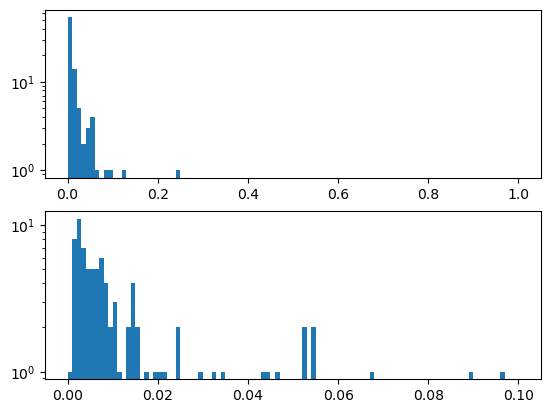

In [149]:
fig, (ax1, ax2) = plt.subplots(2, 1)
ax1.hist(sep2.arcsec.unmasked,range=(0, 1), bins=100, log=True)
ax2.hist(sep2.arcsec.unmasked,range=(0, .1), bins=100, log=True);

MaskedNDArray(64)

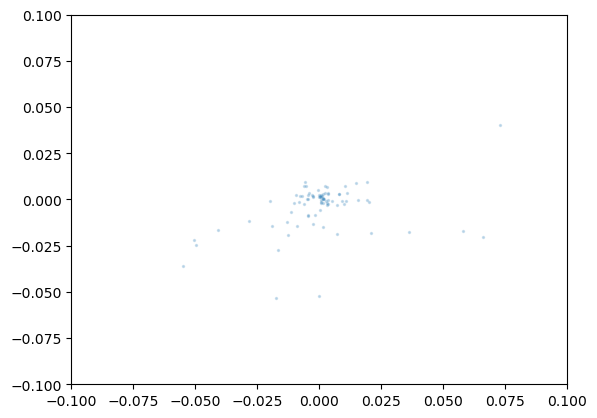

In [159]:
dra2 = gaia_tab['coord'].ra - phat_on_gaia.ra[match2]
ddec2 = gaia_tab['coord'].dec - phat_on_gaia.dec[match2]


plt.scatter(dra2.arcsec, ddec2.arcsec, alpha=.2, s=2)
plt.xlim(-.1, .1)
plt.ylim(-.1, .1)

# Now try to use the good matches to solve for a rotation transform

Main goal is just to see if a rotation is needed at all

In [161]:
good_matches = np.hypot(dra2, ddec2).arcsec < .02
np.sum(good_matches)

MaskedNDArray(64)

In [162]:
gaia_match_tab = gaia_tab[good_matches]
phat_match_tab = phat_tab[match[good_matches]]

We need to pick a center-of-rotation. Lets choose the center of phat, approximated by the mean ra/dec

In [167]:
phat_center = phat_tab['coord'].ra.mean(), phat_tab['coord'].dec.mean()
phat_center

(<Longitude 11.59344503 deg>, <Latitude 42.10334177 deg>)

In [233]:
xp = phat_match_tab['coord'].ra.deg
yp = phat_match_tab['coord'].dec.deg
xg = gaia_match_tab['coord'].ra.deg
yg = gaia_match_tab['coord'].dec.deg

def f(p, inclrot=True):
    raoff, decoff, rotdeg = p
    rotrad = math.radians(rotdeg)
    
    #shifts above have sign of phat + offset = gaia
    # do rotation on phat *then* offsets so that offsets are gaia-frame-aligned
    
    c = math.cos(rotrad)
    s = math.sin(rotrad)
    if not inclrot:
        c=1
        s=0
        
    xprot = xp*c - yp*s
    yprot = xp*s + yp*c
    
    
    xptransformed = xprot + raoff
    yptransformed = yprot + decoff
    
    return np.hypot(xptransformed-xg, yptransformed-yg).unmasked

res = optimize.least_squares(f, [float(dramed.deg), float(ddecmed.deg), 0])
bestraoff, bestdecoff, bestrotdeg = [e*u.deg for e in res.x]
bestraoff.to(u.marcsec), bestdecoff.to(u.marcsec), bestrotdeg

(<Quantity 36.56201402 marcsec>,
 <Quantity 7.036277 marcsec>,
 <Quantity -2.15991892e-05 deg>)

Odd, quite different with rotation.  What happens if we don't include the rotation?

In [234]:
res2 = optimize.least_squares(f, [float(dramed.deg), float(ddecmed.deg), 0], args=(False,))
bestraoff, bestdecoff, bestrotdeg = [e*u.deg for e in res2.x]
bestraoff.to(u.marcsec), bestdecoff.to(u.marcsec), bestrotdeg

(<Quantity 93.713628 marcsec>,
 <Quantity -8.67134294 marcsec>,
 <Quantity 0. deg>)

And covariance matricies?

In [240]:
optimize.curve_fit?

Signature:
optimize.curve_fit(
    f,
    xdata,
    ydata,
    p0=None,
    sigma=None,
    absolute_sigma=False,
    check_finite=True,
    bounds=(-inf, inf),
    method=None,
    jac=None,
    *,
    full_output=False,
    **kwargs,
)
Docstring:
Use non-linear least squares to fit a function, f, to data.

Assumes ``ydata = f(xdata, *params) + eps``.

Parameters
----------
f : callable
    The model function, f(x, ...). It must take the independent
    variable as the first argument and the parameters to fit as
    separate remaining arguments.
xdata : array_like or object
    The independent variable where the data is measured.
    Should usually be an M-length sequence or an (k,M)-shaped array for
    functions with k predictors, but can actually be any object.
ydata : array_like
    The dependent data, a length M array - nominally ``f(xdata, ...)``.
p0 : array_like, optional
    Initial guess for the parameters (length N). If None, then the
    initial values will all be 1 (if th